In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

train = pd.read_csv('/content/drive/MyDrive/leaf-classification/leaf-classification/train.csv')
test = pd.read_csv('/content/drive/MyDrive/leaf-classification/leaf-classification/test.csv')


if 'species' in train.columns:
    unique_classes = train['species'].unique()
    class_counts = train['species'].value_counts()

    print(f"\ud83d\udcd8 Veri setindeki benzersiz sınıf sayısı: {len(unique_classes)}")
    print(f"\ud83d\udcca Sınıfların İsimleri: {unique_classes}")
    print("\n\ud83d\udd22 Her bir sınıfın veri setindeki frekansı (kaç adet olduğu):")
    print(class_counts)
else:
    print("\u274c 'species' sütunu veri setinde bulunamadı.")


label_encoder = LabelEncoder()
train['species'] = label_encoder.fit_transform(train['species'])
num_classes = len(label_encoder.classes_)


X = train.drop(columns=['id', 'species'])
y = train['species']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_encoded = to_categorical(y, num_classes=num_classes)


X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    SimpleRNN(128, activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_val_reshaped, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


test_ids = test['id']
X_test = test.drop(columns=['id'])
X_test_scaled = scaler.transform(X_test)
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

y_pred_labels = label_encoder.inverse_transform(y_pred_classes)


submission = pd.DataFrame({'id': test_ids, 'species': y_pred_labels})
submission.to_csv('submission.csv', index=False)

print("Tahminler başarıyla kaydedildi!")




Model: "sequential_6"

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/zmq/eventloop/zmqstream.py", line 557, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 118, in _handle_event
    event_f()
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/iostream.py", line 381, in _flush
    self.session.send(self.pub_thread, 'stream', content=content,
  File "/usr/local/lib/python3.10/dist-packages/jupyter_client/session.py", line 742, in send
    to_send = self.serialize(msg, ident)
  File "/usr/local/lib/python3.10/dist-packages/jupyter_client/session.py", line 630, in serialize
    content = self.pack(content)
  File "/usr/local/lib/python3.10/dist-packages/jupyter_client/session.py", line 82, in <lambda>
    json_packer = lambda obj: jsonapi.dumps(obj, default=date_default,
  File "/usr/local/lib/python3.10/dist-packages/zmq/utils/json

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 99)                  │           6,435 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,331 (122.39 KB)

 Trainable params: 31,331 (122.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.0093 - loss: 4.5649 - val_accuracy: 0.0253 - val_loss: 4.4581
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.0644 - loss: 4.3290 - val_accuracy: 0.0455 - val_loss: 4.2105
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.1059 - loss: 4.0498 - val_accuracy: 0.0707 - val_loss: 4.0330
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.1814 - loss: 3.7391 - val_accuracy: 0.1061 - val_loss: 3.7077
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.1915 - loss: 3.4672 - val_accuracy: 0.1212 - val_loss: 3.4364
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.2735 - loss: 3.0577 - val_accuracy: 0.1970 - val_loss: 3.0951
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3125 - loss: 2.7658 - val_accuracy: 0.2424 - val_loss: 2.8527
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.3715 - loss: 2.4592 - val_accuracy: 0.

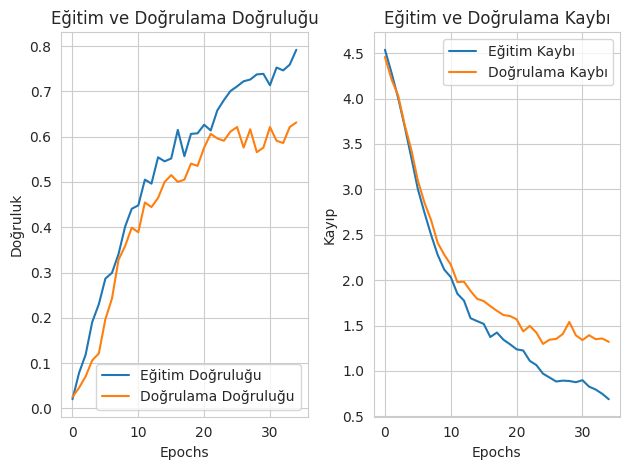

In [37]:
# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()
